# メニュー

## 概要

このレシピは、日本語のテキストデータをMeCabを使って形態素解析を行い、単語の出現頻度に応じてWordCloudで可視化するレシピです。

ECサイト等のカスタマーレビュー文章、アンケートの自由記述、書籍のテキスト、記事やニュース、議事録など、テキスト情報はそのままのデータだと膨大な量になります。そんな大量のテキスト情報を目視で分析するのは日本語だとしても困難を極めます。

そこでWordCloudという、テキストを解析して1ページに要約して可視化する手法が活躍します。テキストの中で重要な部分だけを抽出して可視化することで、一目で内容を把握することができるようになります。

時間をかけずに全体を把握したり、気になるワードについては実際のテキストを目視したりと、効率の良い分析に繋げるための手法がWordCloudです。
WordCloudは自然言語処理の定番ではありますが、実務でも活用しやすい便利な手法です。

今回は、実際に「走れメロス」の書籍のテキストデータを用いてWordCloudによる可視化を行います。テキストデータの扱い方と、WordCloudによる大量のテキストデータの可視化手法を学んでいきましょう。

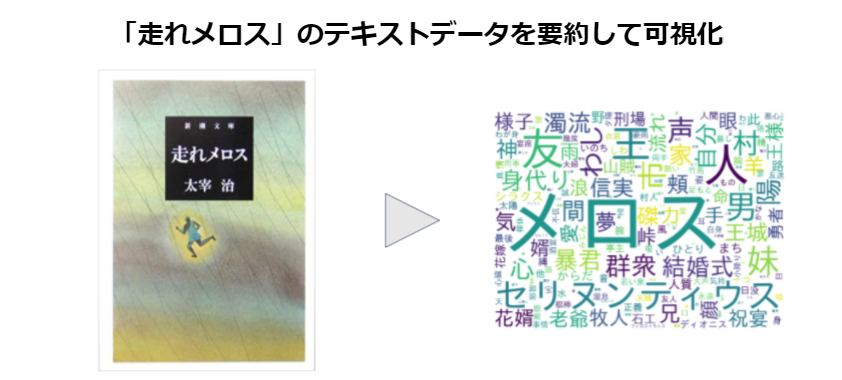

## 学べること

- AI開発の流れ・考え方
- ワードクラウドによる可視化
- 自然言語処理（NLP）の考え方
- 日本語テキストに対する処理

## 始める前のスキルセット

Pythonプログラミングの基礎

## 実務活用例

- 長編記事やニュース、議事録など文字数の多いテキストデータの要約
- ある話題に対して、 SNS上での意見・コメントを可視化
- 選挙演説やスピーチで繰り返し発言された単語の可視化

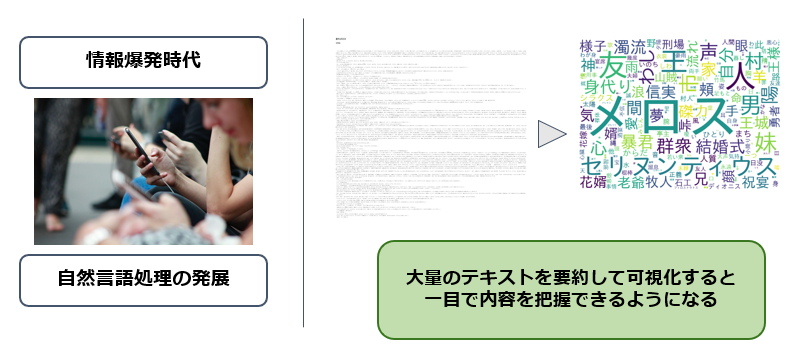

# キッチン

## 開発環境

- Google Colaboratory

## ツール

- Python3
- Word Cloud
- MeCab
- Matplotlib

## データセット

[青空文庫](https://www.aozora.gr.jp/)という著作権が消滅した作品や著者が許諾した作品のテキストを公開している電子図書館からダウンロードします。

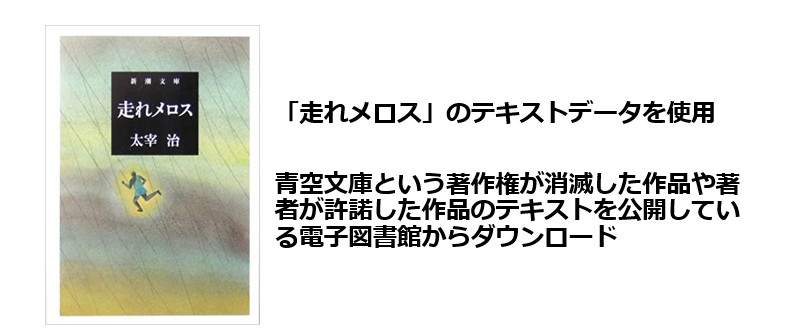

# 調理

## MeCabの導入

私たちが日常生活で使っている言語は「自然言語」と言いますが、自然言語を処理する際に、最も小さい語の単位の意味である「形態素」まで分割して解析することが前処理としてよく行われます。形態素まで分割することで意味をもつ表現要素の最小単位で処理することができます。例えば「画像に可視化する」と「画像へ可視化する」という意味は同じだが表記が異なるテキストがあった場合、それぞれをカウントすると違うものとして扱われてしまいますが、それぞれ「画像/に/可視/化/する」と「画像/へ/可視/化/する」と形態素解析することで同じ形態素「画像」「可視」「化」「する」として扱うことができます。

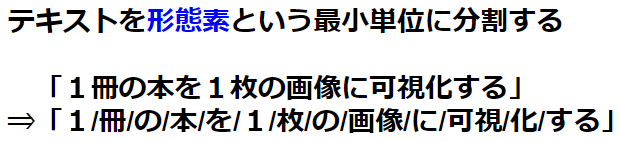

形態素解析を行うにはツールやエンジンを利用する必要がありますが、ここではMeCabと言われるオープンソースの日本語形態素解析エンジンを利用します。

In [1]:
#Mecabのインストール
!pip install mecab-python3==0.996.5

     |████████████████████████████████| 17.1 MB 6.8 MB/s 


※MeCabの最新バージョンではこの後に出てくるChaSen互換の出力フォーマットが指定できなくなったため、インストールするバージョンを本レシピでは指定しています。

はじめに、形態素解析のイメージを掴むために、簡単な一文でプログラミングを行ってみましょう。以下のプログラムを実行してみてください。

In [2]:
#MeCabで形態素解析
import MeCab
mecab = MeCab.Tagger('-Ochasen')
data = mecab.parse('１冊の本を１枚の画像に可視化する')
print(data)

１	イチ	１	名詞-数		
冊	サツ	冊	名詞-接尾-助数詞		
の	ノ	の	助詞-連体化		
本	ホン	本	名詞-一般		
を	ヲ	を	助詞-格助詞-一般		
１	イチ	１	名詞-数		
枚	マイ	枚	名詞-接尾-助数詞		
の	ノ	の	助詞-連体化		
画像	ガゾウ	画像	名詞-一般		
に	ニ	に	助詞-格助詞-一般		
可視	カシ	可視	名詞-一般		
化	カ	化	名詞-接尾-サ変接続		
する	スル	する	動詞-自立	サ変・スル	基本形
EOS



このように形態素解析では、最小単位の言葉で意味や品詞を判別していきます。

## 日本語フォントのインストール

Google Colaboratoryにはデフォルトでは日本語フォントが入っていないため、インストールしておきます。日本語フォントがないと日本語を表示することができず「▯」で出力されてしまいます。今回は日本語フォントとして広く使用されているIPAゴシックをインストールします。

In [3]:
#日本語フォントをインストール
!apt-get -y install fonts-ipafont-gothic

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  fonts-ipafont-mincho
The following NEW packages will be installed:
  fonts-ipafont-gothic fonts-ipafont-mincho
0 upgraded, 2 newly installed, 0 to remove and 37 not upgraded.
Need to get 8,251 kB of archives.
After this operation, 28.7 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-ipafont-gothic all 00303-18ubuntu1 [3,526 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-ipafont-mincho all 00303-18ubuntu1 [4,725 kB]
Fetched 8,251 kB in 2s (4,314 kB/s)
Selecting previously unselected package fonts-ipafont-gothic.
(Reading database ... 155229 files and directories currently installed.)
Preparing to unpack .../fonts-ipafont-gothic_00303-18ubuntu1_all.deb ...
Unpacking fonts-ipafont-gothic (00303-18ubuntu1) ...
Selecting previously unselected package fonts-ip

インストールしたフォントは`/usr/share/fonts/truetype/fonts-japanese-gothic.ttf`として格納されています。フォントを使用する際にはこちらのファイルパスを指定します。

## 解析データのダウンロード

事前に解析を行う対象のテキストデータを用意する必要があります。ここでは、青空文庫の 「走れメロス」を利用します。データは以下のURLのサイトにある「テキストファイル(ルビあり)」を利用します。

https://www.aozora.gr.jp/cards/000035/card1567.html

手動でファイルをダウンロードしてアップロードして解凍することも可能ですが、コマンド記述により実行することも可能です。
ここではデータ取得のためのコマンドを紹介しておきます。
curlコマンドでテキストデータが圧縮されているzipファイルをダウンロードして、unzipコマンドで解凍します。
そしてsedコマンドでhashire_merosu.txtから文章のみ切り出してhasire_merosu_data.txtに保存します。
これでテキストの最初と最後に含まれている作品の説明文を切り出し、必要な作品本文のみとすることができます。

In [4]:
#走れメロスのテキストデータ（zipファイル）をダウンロード
!curl -O "https://www.aozora.gr.jp/cards/000035/files/1567_ruby_4948.zip"
#zipファイルを解凍
!unzip 1567_ruby_4948.zip
#文章のみ切り出し
!sed -n 17,91p hashire_merosu.txt > hashire_merosu_data.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 10952  100 10952    0     0  26647      0 --:--:-- --:--:-- --:--:-- 26647
Archive:  1567_ruby_4948.zip
Made with MacWinZipper™
  inflating: hashire_merosu.txt      


これ以降はPythonのコードを記述します。まず文章のみとなったテキストファイルを読み込みます。この時、文字コードをshift_jisと指定することを忘れないようにしましょう。shift_jisは日本語を含む文字列を表現するために用いられる文字コードの1つで、これを指定することで文字化けを起こさずに日本語を正しく処理することができます。

In [5]:
#テキストファイル読み込み
text_file = open('/content/hashire_merosu_data.txt',encoding = 'shift_jis')
contents = text_file.read()

## MeCabを用いた形態素解析の実行

ここからは最初にインストールしたMeCabを利用して形態素解析を行っていきます。

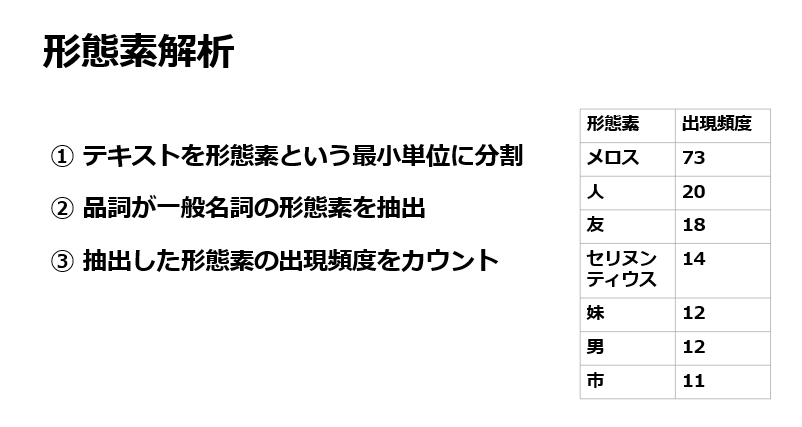

一度、MeCabがどのようなものか把握するために、下記のコードを実行してみましょう。出力フォーマットにはいくつか種類がありますが、ここでは「chasen」としています。　
※MeCabでは’-Ochasen’と記載して指定します。

今回は走れメロスの文章の中で、頻度の多い名詞を抽出することにします。一概に名詞と言ってもMeCabでは様々な種類がありますので、ここでは名詞の中でも「一般」に分類されたものに限定しています。`pos_type`に品詞、`subtype`に品詞細分類１の情報が入っています。また`node.surface`とすると表層形を取得できます。「名詞」と「出現回数」の結果が分かるように画面出力も行ってみましょう。

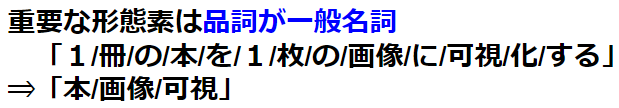

In [6]:
import MeCab
from wordcloud import WordCloud
from collections import Counter

#MeCabで形態素解析
mecab = MeCab.Tagger('-Ochasen')
node = mecab.parseToNode(contents)
words = []

while node is not None:

    #品詞と品詞細分類１を抽出
    pos_type = node.feature.split(',')[0]
    subtype = node.feature.split(',')[1]

    #品詞が名詞、品詞細分類１が一般のとき
    if pos_type in ['名詞']:
        if subtype in ['一般']:
            words.append(node.surface)

    node = node.next

#出現回数を集計し、最頻順にソート
words_count = Counter(words)
result = words_count.most_common()

#出現回数結果の画面出力
for word, cnt in result:
    print(word, cnt)

メロス 73
人 20
友 18
王 16
セリヌンティウス 14
妹 12
男 12
市 11
村 9
声 9
わし 8
陽 8
心 7
群衆 7
結婚式 6
暴君 6
自分 6
身代り 6
間 6
家 6
濁流 6
羊 5
王城 5
磔 5
兄 5
頬 5
神 5
気 5
信実 5
夢 5
牧人 4
花婿 4
祝宴 4
様子 4
老爺 4
王様 4
婿 4
顔 4
手 4
眼 4
雨 4
浪 4
流れ 4
愛 4
力 4
峠 4
山賊 4
命 4
勇者 4
刑場 4
野 3
此 3
シラクス 3
花嫁 3
石工 3
まち 3
路 3
からだ 3
人質 3
ひとり 3
ディオニス 3
しわ 3
人間 3
情 3
亭主 3
日没 3
いのち 3
縄 3
村人 3
姿 3
他 3
一つ 3
身 3
腕 3
太陽 3
正義 3
精 3
胸 3
水 3
音 3
風 3
最後 3
邪智 2
里 2
暮し 2
衣裳 2
竹馬 2
日 2
若い衆 2
歌 2
両手 2
悪心 2
自身 2
悪徳 2
溜息 2
罪 2
口 2
わ 2
足もと 2
嗄 2
嘘 2
友人 2
気持 2
願い 2
永遠 2
もの 2
事情 2
用事 2
豪雨 2
わが身 2
小降り 2
未練 2
宝 2
宴席 2
幾度 2
大声 2
夫婦 2
友達 2
誠 2
い 2
目 2
棍棒 2
天 2
真 2
不信 2
みじん 2
心臓 2
かな 2
耳 2
頭 2
葉 2
酒宴 2
裸体 2
塔 2
夕陽 2
フィロストラトス 2
仲間 2
マント 2
暴虐 1
政治 1
笛 1
山越え 1
こ 1
父 1
母 1
女房 1
律 1
品々 1
都 1
大路 1
楽しみ 1
首 1
ろう 1
語勢 1
あたり 1
世嗣 1
つぎ 1
御子 1
皇后 1
賢 1
臣 1
アレキス 1
国王 1
臣下 1
疑い 1
十字架 1
呆 1
警吏 1
短剣 1
騒ぎ 1
短刀 1
威厳 1
以 1
眉間 1
皺 1
民 1
忠誠 1
心構え 1
あて 1
私慾 1
呟 1
つぶ 1
ためいき 1
地位 1
賤 1
腹 1
綿 1
奥底 1
詫 1
びたって 1
悧巧 1
惚 1
命乞い 1
視線 1
瞬時 1
日限 1
ば 1
うそ 1
小鳥 1
帰り 1
無二 1
日暮 1
北 1
叟笑 1
嘘つき 1
だま 1
振り

今回は名詞の中でも「一般」に分類されたものに限定しましたが、名詞だけをとっても次のようにたくさんの種類があります。（参考：https://taku910.github.io/mecab/posid.html）

```
名詞,サ変接続,*,* 36
名詞,ナイ形容詞語幹,*,* 37
名詞,一般,*,* 38
名詞,引用文字列,*,* 39
名詞,形容動詞語幹,*,* 40
名詞,固有名詞,一般,* 41
名詞,固有名詞,人名,一般 42
名詞,固有名詞,人名,姓 43
名詞,固有名詞,人名,名 44
名詞,固有名詞,組織,* 45
名詞,固有名詞,地域,一般 46
名詞,固有名詞,地域,国 47
名詞,数,*,* 48
名詞,接続詞的,*,* 49
名詞,接尾,サ変接続,* 50
名詞,接尾,一般,* 51
名詞,接尾,形容動詞語幹,* 52
名詞,接尾,助数詞,* 53
名詞,接尾,助動詞語幹,* 54
名詞,接尾,人名,* 55
名詞,接尾,地域,* 56
名詞,接尾,特殊,* 57
名詞,接尾,副詞可能,* 58
名詞,代名詞,一般,* 59
名詞,代名詞,縮約,* 60
名詞,動詞非自立的,*,* 61
名詞,特殊,助動詞語幹,* 62
名詞,非自立,一般,* 63
名詞,非自立,形容動詞語幹,* 64
名詞,非自立,助動詞語幹,* 65
名詞,非自立,副詞可能,* 66
名詞,副詞可能,*,* 67
```

## Word Cloudでの画像生成

最後にWord Cloudを用いて、前項で抽出した一般名詞とその出現回数のデータを利用し、画像を生成します。Word Cloudとは、語彙を出現頻度に比例する大きさで雲のように並べることができる可視化手法です。今回は、走れメロスの書籍から算出した名詞の出現頻度からWord Cloudの画像を生成します。

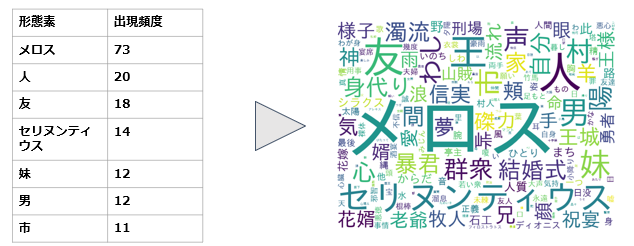

Word Cloudには、辞書型でデータを取り込むため、初めに辞書型に変換します。その後、Word Cloudの背景やフォント、また画像サイズを設定します。フォントは以前インストールしたIPAゴシックのファイルパスを指定します。そして、画像を生成し画面に出力します。出力にはPythonの描画用ライブラリであるmatplotlibを使用します。

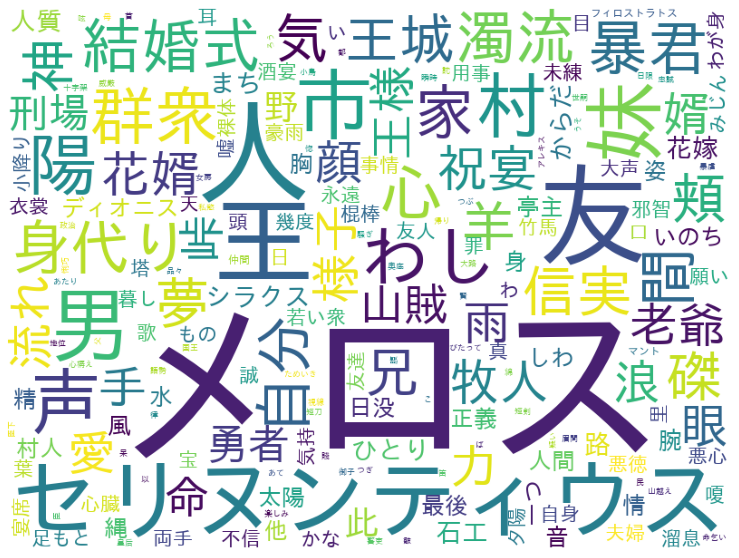

In [7]:
#wordcloud取込用に辞書型ヘ変換
dic_result = dict(result)

#Word Cloudで画像生成
from wordcloud import WordCloud
wordcloud = WordCloud(background_color='white',
font_path='/usr/share/fonts/truetype/fonts-japanese-gothic.ttf',
width=800,height=600).fit_words(dic_result)

#生成した画像の表示
import matplotlib.pyplot as plt 
from matplotlib import rcParams

plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

画像が出力されましたでしょうか？出現頻度の高い一般名詞ほど大きく表示がされています。このように、大量のテキストデータから出現頻度の高いもののみ可視化することで、テキストのみではイメージの付きづらい内容を視覚的に把握することができます。これでテキストが膨大なときに全てを目視することなく、一目で全体像を把握することができますね。

## まとめ

今回は自然言語処理のうち、定番ではありますが実務でも活用しやすい便利な手法であるWord Cloudについて、実際に体験し学習することができました。

Word Cloudによる可視化の途中で行った形態素解析に関して、形態素はあくまでも意味をもつ最小の言葉の単位のため、用途に応じて解析の対象を変える必要はあります。構文や文脈といった違う単位や切り口での解析には、それぞれ別の手法が必要となります。更には、翻訳や音声認識、情報検索等といった複合技術と組み合わせると、処理するための技術は膨大なものとなります。是非、様々な自然言語処理の技術を学んでいきましょう。